In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

In [3]:
import os
import sys

MODULE_PATH = os.path.abspath(os.path.join("..", "src"))

if MODULE_PATH not in sys.path:
    sys.path.append(MODULE_PATH)

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from natsort import natsorted

from config import REPORTS_DIR, EXTERNAL_DATA_DIR, PROCESSED_DATA_DIR # type: ignore

2025-05-22 17:53:57.413 | INFO     | config:<module>:11 - PROJ_ROOT path is: /home/code-dragon-03/Desktop/High Priority/Research Work/Learned-Image-Compression


In [5]:
if not os.path.exists(os.path.join(REPORTS_DIR, "dataset")):
    os.makedirs(os.path.join(REPORTS_DIR, "dataset"))

FIGURES_DIR = os.path.join(REPORTS_DIR, "dataset")

In [6]:
DATA_PATH = os.path.join(EXTERNAL_DATA_DIR, 'kodak')

FIGURE_PATH = os.path.join(FIGURES_DIR)

In [7]:
images = [img for img in os.listdir(DATA_PATH) if img.endswith('.png') or img.endswith('.jpg')]

images = natsorted(images)

print(f'The total number of images are: {len(images)}.')

The total number of images are: 24.


In [8]:
print('-'*50)
print('The images in the Kodak dataset are:')
print('-'*50, end='\n\n')

for img in images:
    print(img, end=' | ')

--------------------------------------------------
The images in the Kodak dataset are:
--------------------------------------------------

kodim01.png | kodim02.png | kodim03.png | kodim04.png | kodim05.png | kodim06.png | kodim07.png | kodim08.png | kodim09.png | kodim10.png | kodim11.png | kodim12.png | kodim13.png | kodim14.png | kodim15.png | kodim16.png | kodim17.png | kodim18.png | kodim19.png | kodim20.png | kodim21.png | kodim22.png | kodim23.png | kodim24.png | 

In [9]:
print('-'*50)
print('The shape of the images in the Kodak dataset are:')
print('-'*50, end='\n\n')

for img in images:
    image = Image.open(os.path.join(DATA_PATH, img))
    image = np.array(image)
    print(f'{img}:{image.shape}', end=' | ')

--------------------------------------------------
The shape of the images in the Kodak dataset are:
--------------------------------------------------

kodim01.png:(512, 768, 3) | kodim02.png:(512, 768, 3) | kodim03.png:(512, 768, 3) | kodim04.png:(768, 512, 3) | kodim05.png:(512, 768, 3) | kodim06.png:(512, 768, 3) | kodim07.png:(512, 768, 3) | kodim08.png:(512, 768, 3) | kodim09.png:(768, 512, 3) | kodim10.png:(768, 512, 3) | kodim11.png:(512, 768, 3) | kodim12.png:(512, 768, 3) | kodim13.png:(512, 768, 3) | kodim14.png:(512, 768, 3) | kodim15.png:(512, 768, 3) | kodim16.png:(512, 768, 3) | kodim17.png:(768, 512, 3) | kodim18.png:(768, 512, 3) | kodim19.png:(768, 512, 3) | kodim20.png:(512, 768, 3) | kodim21.png:(512, 768, 3) | kodim22.png:(512, 768, 3) | kodim23.png:(512, 768, 3) | kodim24.png:(512, 768, 3) | 

--------------------------------------------------
Ploting the histogram for the frequency in the images:
--------------------------------------------------



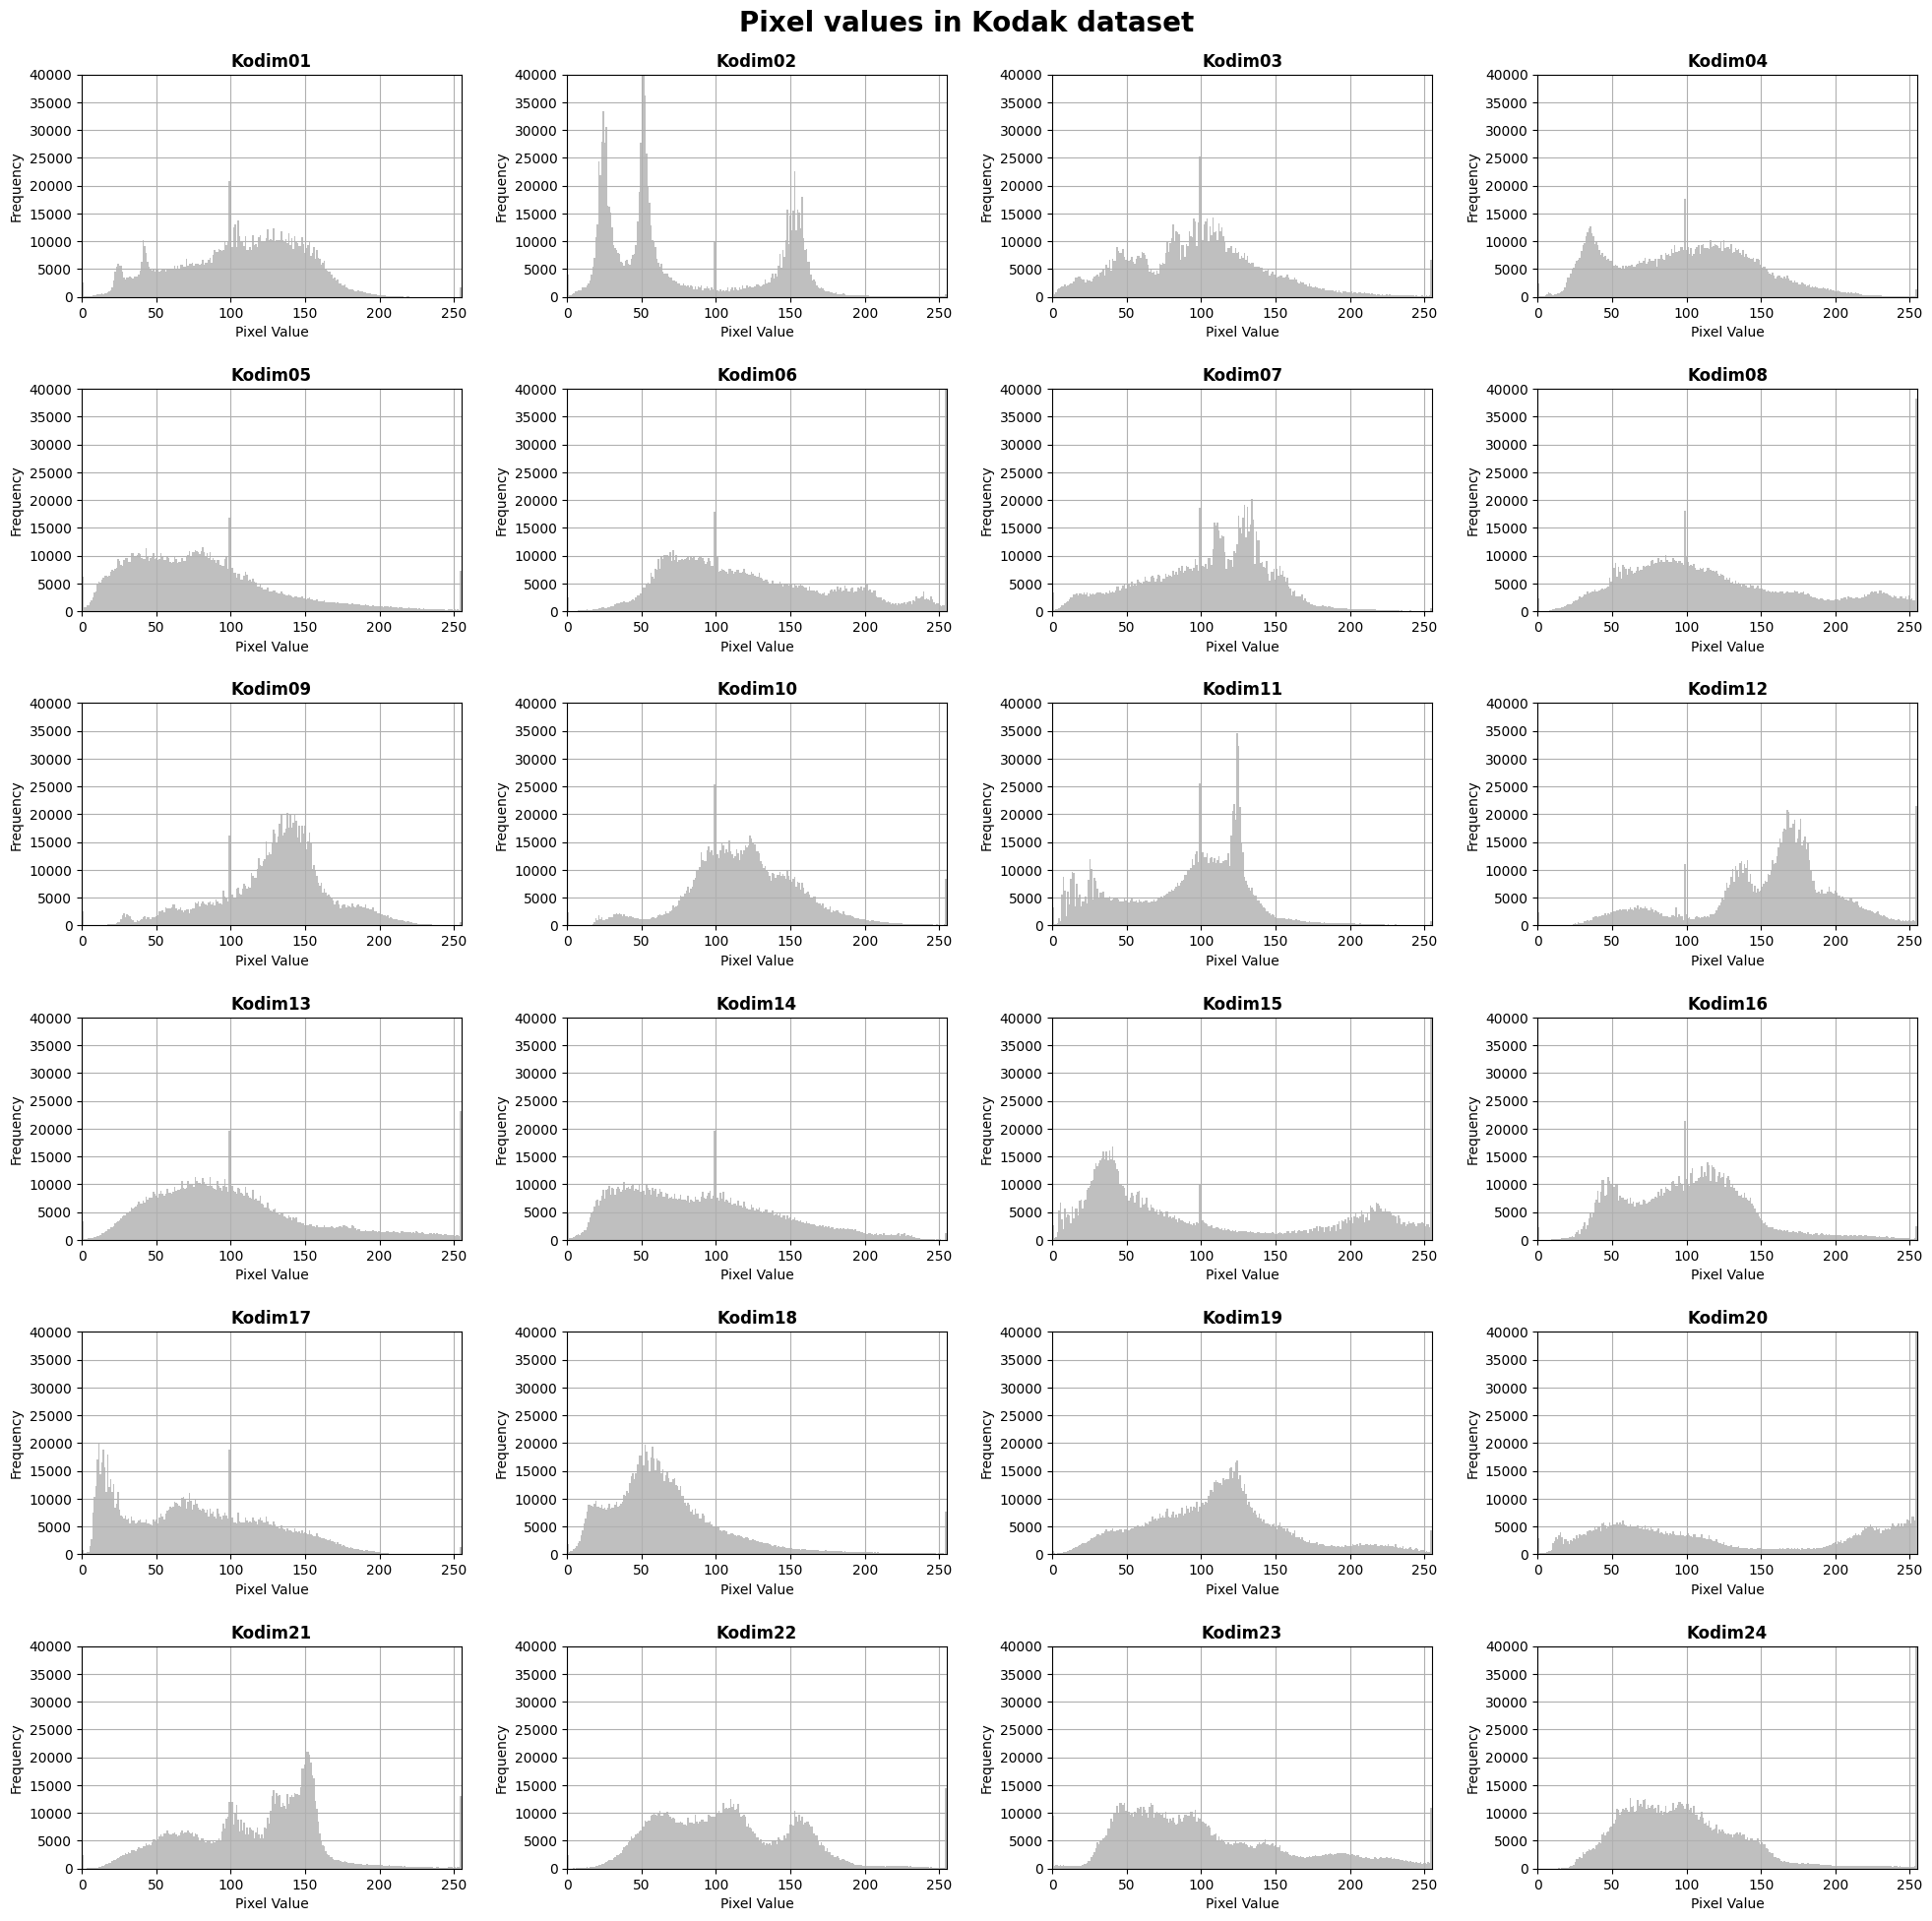

In [10]:
print('-'*50)
print('Ploting the histogram for the frequency in the images:')
print('-'*50, end='\n\n')

fig, ax = plt.subplots(6, 4, figsize=(20, 20))

fig.suptitle('Pixel values in Kodak dataset', fontsize=20, fontweight='bold')

axes = ax.flatten()

for img, ax in zip(images, axes):
    image = Image.open(os.path.join(DATA_PATH, img))
    image = np.array(image)
    ax.hist(image.ravel(), bins=256, color='gray', alpha=0.5)
    ax.set_title(img.capitalize().replace('.png', '').replace('.jpg', ''), fontsize=12, fontweight='bold')   
    ax.set_xlim([0, 255])
    ax.set_ylim([0, 40000])
    ax.set_xlabel('Pixel Value')
    ax.set_ylabel('Frequency')
    ax.grid()

plt.tight_layout(pad=2)
plt.savefig(FIGURE_PATH + '/ImagePixelDistribution.png', dpi=300, bbox_inches='tight')
plt.show()

-----------------------------------
Ploting the preview of the dataset:
-----------------------------------



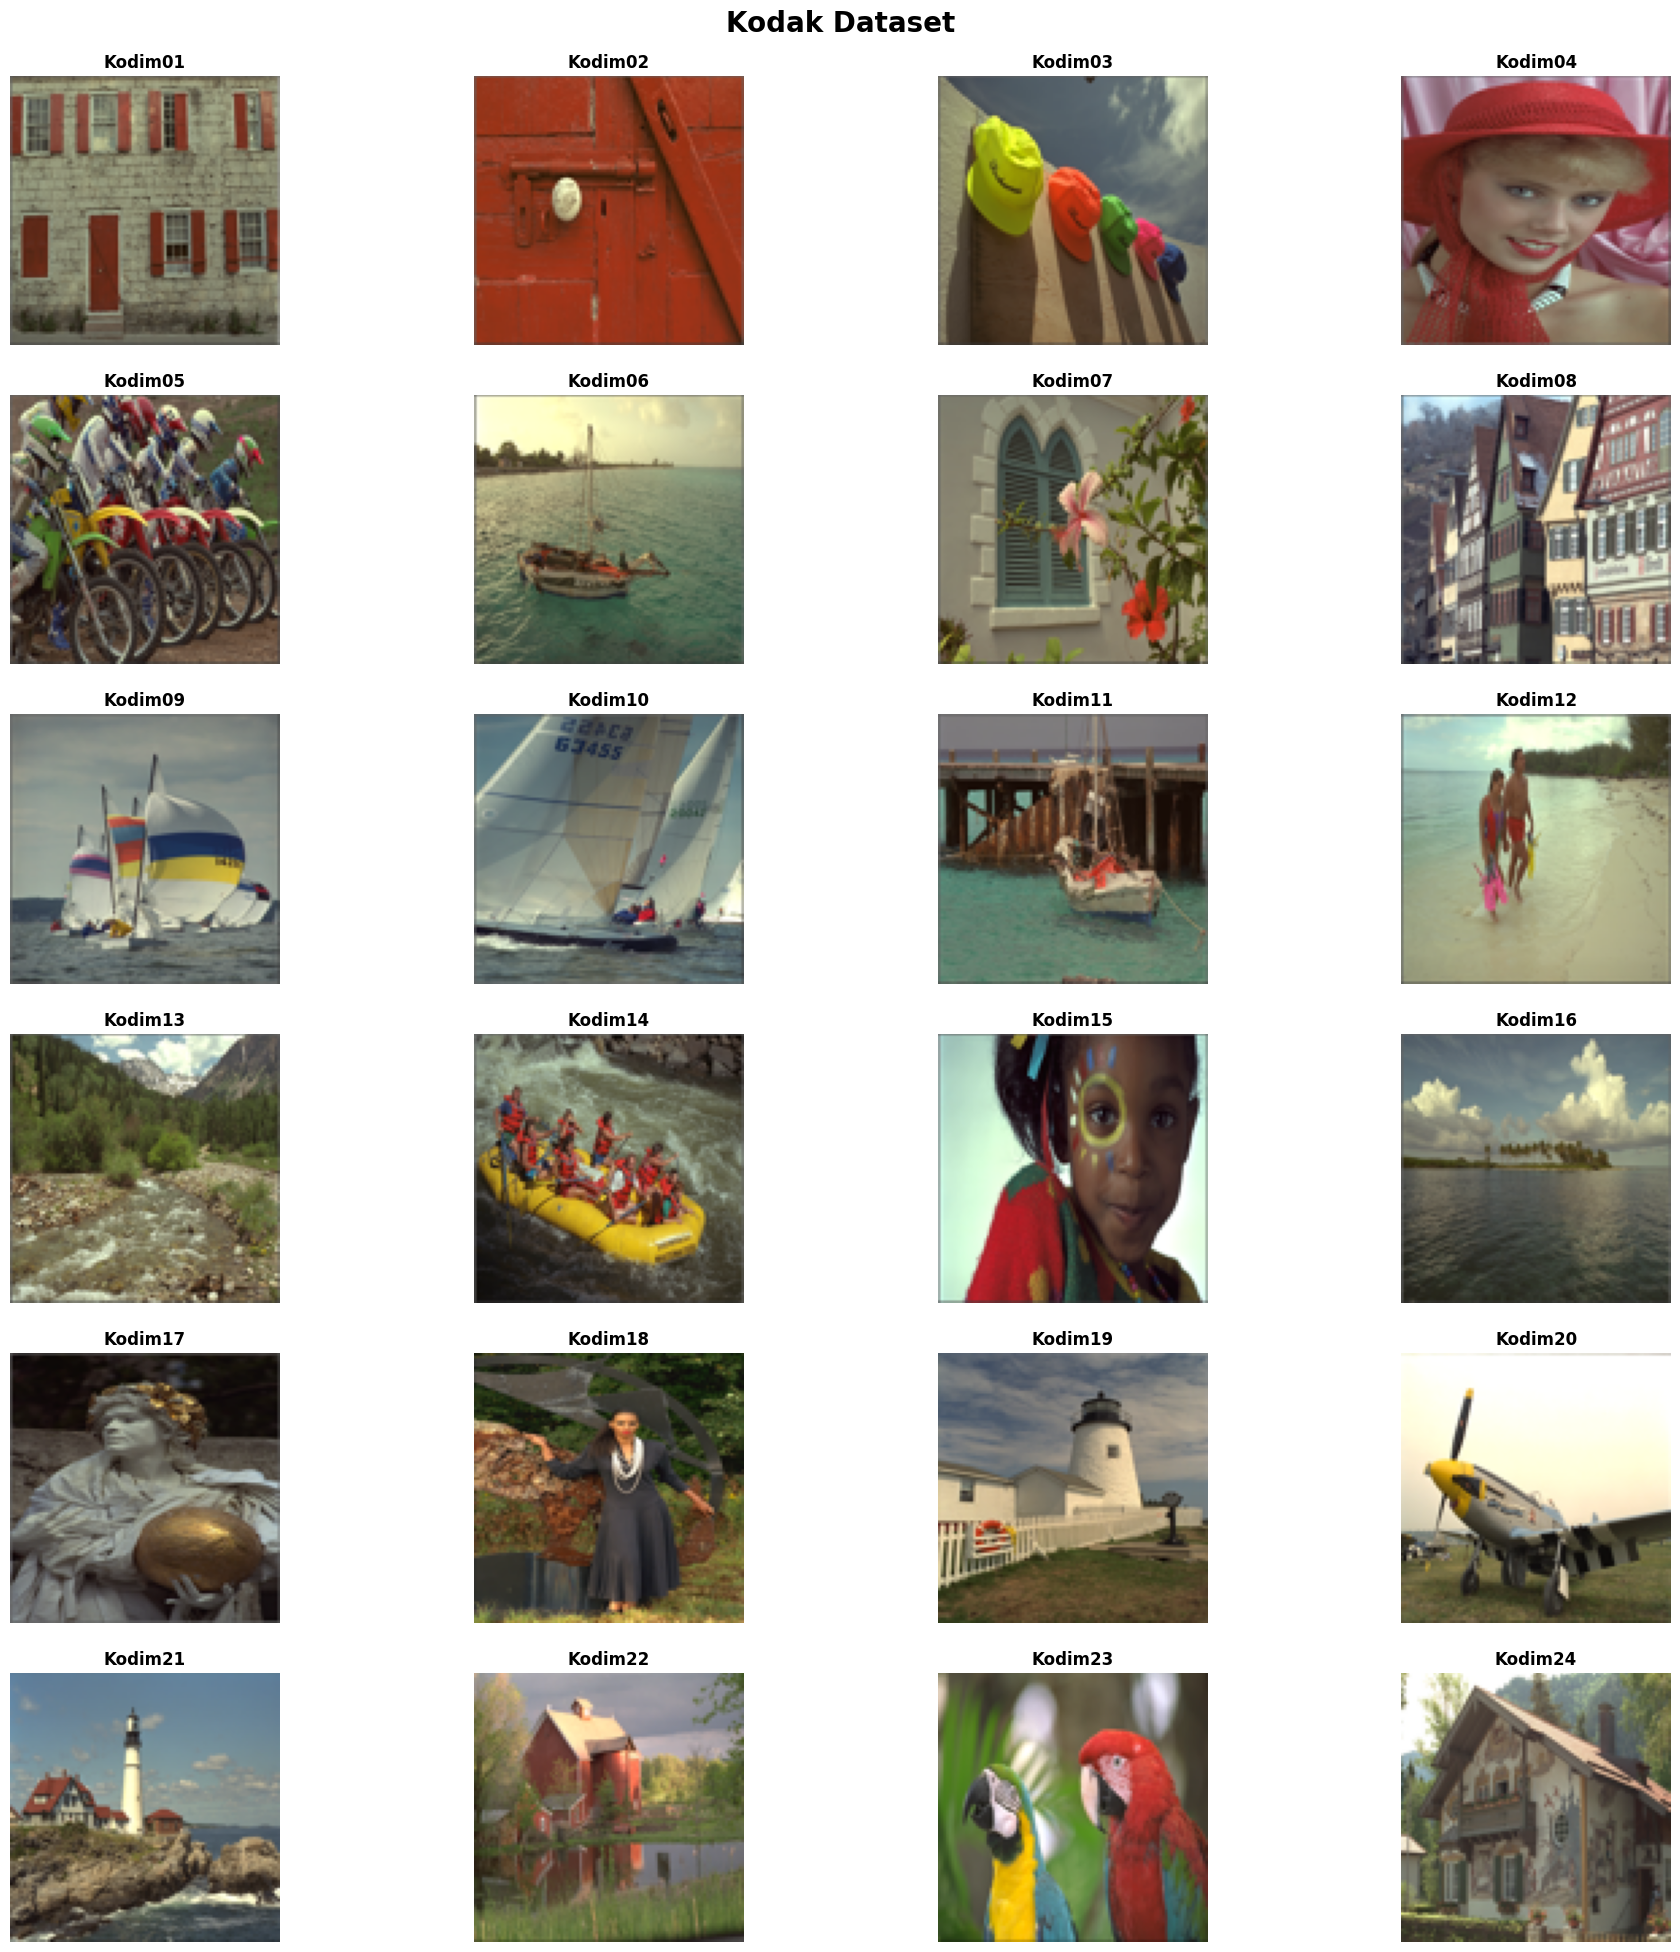

In [11]:
print('-'*35)
print('Ploting the preview of the dataset:')
print('-'*35, end='\n\n')

fig, ax = plt.subplots(6, 4, figsize=(20,20))

fig.suptitle('Kodak Dataset', fontsize=20, fontweight='bold')

axes = ax.flatten()

for img, ax in zip(images, axes):
    if img.endswith('.png'):
        try:
            image = Image.open(os.path.join(DATA_PATH, img))
            image = image.resize((100, 100))
            ax.set_title(img.capitalize().replace('.png', ''), fontsize=12, fontweight='bold')
            ax.imshow(image)
            ax.axis('off')
        except Exception as e:
            print(f"Error loading image {img}")

for ax in axes[len(images):]:
    ax.remove()

plt.tight_layout(pad=2)
plt.savefig(FIGURE_PATH + '/KodakDatasetPreview.png', dpi=150, bbox_inches='tight')
plt.show()